In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
# !pip install --upgrade --no-cache-dir git+https://github.com/StreamAlpha/tvdatafeed.git

In [3]:
from tvDatafeed import TvDatafeed, Interval

In [4]:
tv = TvDatafeed()

you are using nologin method, data you access may be limited


In [5]:
n=3

In [6]:
bitcoi = tv.get_hist(symbol='BTCUSD', exchange='COINBASE', interval=Interval.in_daily, n_bars=5000)
bitcoi = bitcoi.reset_index()
dataTypeSeries = bitcoi.dtypes
print('Data type of each column of Dataframe :')
print(dataTypeSeries)
bitcoin=bitcoi[:-n].copy()
bitcoin

Data type of each column of Dataframe :
datetime    datetime64[ns]
symbol              object
open               float64
high               float64
low                float64
close              float64
volume             float64
dtype: object


,datetime,symbol,open,high,low,close,volume
0,2014-11-30 19:00:00,COINBASE:BTCUSD,300.00,370.00,300.00,370.00,0.056600
1,2014-12-01 19:00:00,COINBASE:BTCUSD,377.00,378.00,377.00,378.00,15.013670
2,2014-12-02 19:00:00,COINBASE:BTCUSD,377.90,378.00,377.01,378.00,0.546660
3,2014-12-03 19:00:00,COINBASE:BTCUSD,377.10,377.10,377.10,377.10,0.010010
4,2014-12-05 19:00:00,COINBASE:BTCUSD,378.00,378.00,378.00,378.00,0.015010
...,...,...,...,...,...,...,...
2576,2022-01-22 19:00:00,COINBASE:BTCUSD,35075.70,36555.55,34625.00,36282.47,17440.241920
2577,2022-01-23 19:00:00,COINBASE:BTCUSD,36275.28,37574.63,32933.33,36693.32,38776.304610
2578,2022-01-24 19:00:00,COINBASE:BTCUSD,36687.58,37579.81,35716.15,36980.00,21597.536500
2579,2022-01-25 19:00:00,COINBASE:BTCUSD,36980.00,38960.00,36254.97,36840.63,26760.155455


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-pa

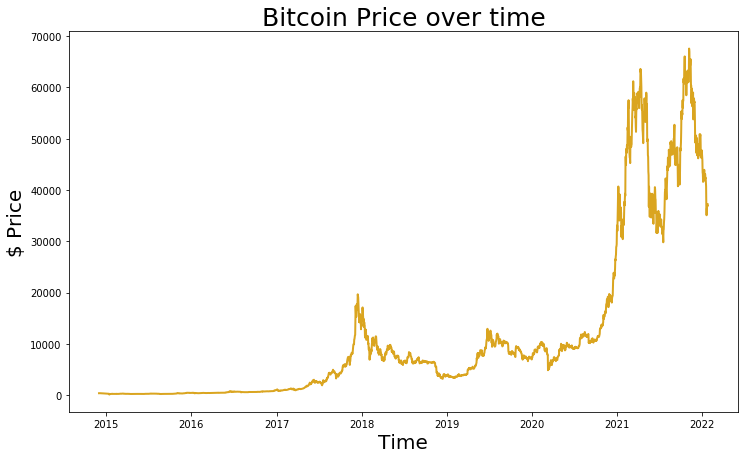

In [7]:
plt.figure(figsize = (12, 7))
plt.plot(bitcoin["datetime"], bitcoin["close"], color='goldenrod', lw=2)
plt.title("Bitcoin Price over time", size=25)
plt.xlabel("Time", size=20)
plt.ylabel("$ Price", size=20)
plt.show()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


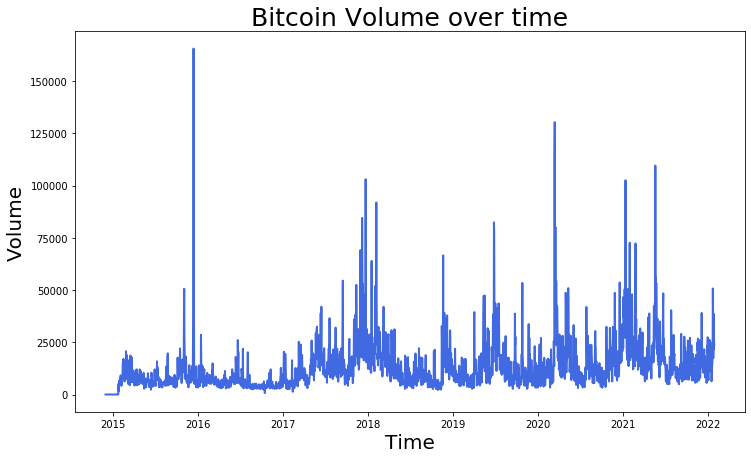

In [8]:
plt.figure(figsize = (12, 7))
plt.plot(bitcoin["datetime"], bitcoin["volume"], color='royalblue', lw=2)
plt.title("Bitcoin Volume over time", size=25)
plt.xlabel("Time", size=20)
plt.ylabel("Volume", size=20);

In [9]:
bitcoin.isnull().sum()

datetime    0
symbol      0
open        0
high        0
low         0
close       0
volume      0
dtype: int64

In [10]:
required_features = ['open', 'high', 'low', 'volume']
output_label = 'close'

In [11]:
x_train, x_test, y_train, y_test = train_test_split(bitcoin[required_features],bitcoin[output_label],test_size = 0.2)

In [12]:
x_test

,open,high,low,volume
1533,3990.00,3991.00,3936.30,3579.77959
440,409.66,411.00,404.72,4840.14684
2286,55962.67,58152.00,55700.00,8073.61182
1686,10352.78,10475.82,9978.00,7308.01230
1546,4091.01,4131.87,4042.51,5262.18992
...,...,...,...,...
2120,12938.00,13175.00,12884.31,7915.36098
618,606.86,609.99,605.16,3888.06453
1379,6196.01,6288.45,6151.00,3762.54542
989,4100.00,4125.22,3850.44,13781.16970


In [13]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [14]:
model.score(x_test, y_test)

0.99947224989128

In [15]:
future_set = bitcoin.tail(n).copy()
future_set

,datetime,symbol,open,high,low,close,volume
2578,2022-01-24 19:00:00,COINBASE:BTCUSD,36687.58,37579.81,35716.15,36980.00,21597.536500
2579,2022-01-25 19:00:00,COINBASE:BTCUSD,36980.00,38960.00,36254.97,36840.63,26760.155455
2580,2022-01-26 19:00:00,COINBASE:BTCUSD,36846.22,37249.00,35526.36,37188.37,23533.004484


In [16]:
prediction = model.predict(future_set[required_features])
prediction

array([36688.8922361 , 38078.28355968, 36205.03512604])

In [17]:
import datetime
future_set["datetime"]=future_set["datetime"]+datetime.timedelta(days=n)
future_set["predict"]=prediction
  
future_set

,datetime,symbol,open,high,low,close,volume,predict
2578,2022-01-27 19:00:00,COINBASE:BTCUSD,36687.58,37579.81,35716.15,36980.00,21597.536500,36688.892236
2579,2022-01-28 19:00:00,COINBASE:BTCUSD,36980.00,38960.00,36254.97,36840.63,26760.155455,38078.283560
2580,2022-01-29 19:00:00,COINBASE:BTCUSD,36846.22,37249.00,35526.36,37188.37,23533.004484,36205.035126


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-pa

Text(0, 0.5, '$ Price')

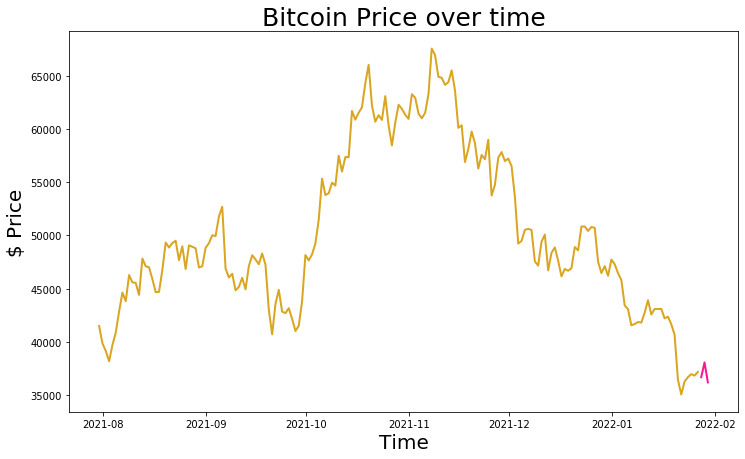

In [18]:
plt.figure(figsize = (12, 7))
plt.plot(bitcoin["datetime"][2400:], bitcoin["close"][2400:], color='goldenrod', lw=2)
plt.plot(future_set["datetime"], future_set["predict"], color='deeppink', lw=2)
plt.title("Bitcoin Price over time", size=25)
plt.xlabel("Time", size=20)
plt.ylabel("$ Price", size=20)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/si

Text(0, 0.5, '$ Price')

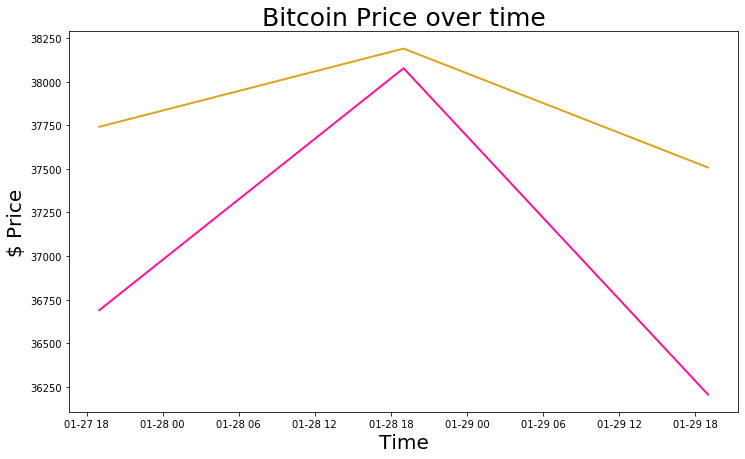

In [19]:
plt.figure(figsize = (12, 7))
plt.plot(bitcoi["datetime"].tail(n), bitcoi["close"].tail(n), color='goldenrod', lw=2)
plt.plot(future_set["datetime"], future_set["predict"], color='deeppink', lw=2)
plt.title("Bitcoin Price over time", size=25)
plt.xlabel("Time", size=20)
plt.ylabel("$ Price", size=20)

In [20]:
#calculate error
from sklearn.metrics import mean_squared_error
import numpy as np
mean_squared_error(np.array(bitcoi["close"].tail(n)), np.array(future_set["predict"]))
# np.array(bitcoi["close"].tail(n))
# np.array(future_set["predict"])

940078.2312393481